# Import that data

In [59]:
# Handling importing all the libraries I need
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder

df = pd.read_csv("data/CHK_5629_CURRENT_VIEW.csv")

df

,Status,Date,Description,Debit,Credit
0,Cleared,3/11/2025,ACH Electronic Debit - MERCURY INSPAYMENT,195.20,NaN
1,Cleared,3/7/2025,ACH Electronic Debit - COMENITY PAY OHWEB PYMT...,155.40,NaN
2,Cleared,3/6/2025,ACH Electronic Debit - DISCOVER E-PAYMENT 2550,493.12,NaN
3,Cleared,3/6/2025,ACH Electronic Debit - CAPITAL ONEONLINE PMT 4...,174.98,NaN
4,Cleared,3/3/2025,Transfer From Money Market 03/01 04:44p #5720 ...,NaN,5000.0
...,...,...,...,...,...
445,Cleared,9/25/2023,Debit PIN Purchase ARCO #42839LAKEWOOD13AUS00155,59.10,NaN
446,Cleared,9/19/2023,Debit Card Purchase 09/14 11:58a #5720 CHICK-F...,26.07,NaN
447,Cleared,9/19/2023,Debit Card Purchase 09/15 04:01p #5720 IN N OU...,18.52,NaN
448,Cleared,9/18/2023,Debit Card Purchase 09/13 05:01p #5733 RARA TH...,19.50,NaN


# Clean up that data

In [ ]:
# Just some testing on the data
date = df.loc[0, "Date"]
date_split = date.split("/")

print(date_split)

['3', '11', '2025']


In [60]:
# Code
dates = df["Date"]

months = []
days = []
years = []

for date in dates:
    date_split = str(date).split("/")
    months.append(date_split[0])
    days.append(date_split[1])
    years.append(date_split[2])

df["Month"] = months
df["Day"] = days
df["Year"] = years

df = df.dropna(subset=["Debit"])

df

,Status,Date,Description,Debit,Credit,Month,Day,Year
0,Cleared,3/11/2025,ACH Electronic Debit - MERCURY INSPAYMENT,195.20,NaN,3,11,2025
1,Cleared,3/7/2025,ACH Electronic Debit - COMENITY PAY OHWEB PYMT...,155.40,NaN,3,7,2025
2,Cleared,3/6/2025,ACH Electronic Debit - DISCOVER E-PAYMENT 2550,493.12,NaN,3,6,2025
3,Cleared,3/6/2025,ACH Electronic Debit - CAPITAL ONEONLINE PMT 4...,174.98,NaN,3,6,2025
5,Cleared,3/3/2025,ACH Electronic Debit - MORTGAGE CAPITAL MTGPAY...,2723.22,NaN,3,3,2025
...,...,...,...,...,...,...,...,...
445,Cleared,9/25/2023,Debit PIN Purchase ARCO #42839LAKEWOOD13AUS00155,59.10,NaN,9,25,2023
446,Cleared,9/19/2023,Debit Card Purchase 09/14 11:58a #5720 CHICK-F...,26.07,NaN,9,19,2023
447,Cleared,9/19/2023,Debit Card Purchase 09/15 04:01p #5720 IN N OU...,18.52,NaN,9,19,2023
448,Cleared,9/18/2023,Debit Card Purchase 09/13 05:01p #5733 RARA TH...,19.50,NaN,9,18,2023


# Calculate some sums 

In [43]:
#Code
df_monthly = pd.DataFrame()
df_monthly = df.groupby(["Month", "Year", "Day"], as_index=False)["Debit"].sum()
df_monthly["Month"] = df_monthly["Month"].astype(int)
df_monthly = df_monthly.sort_values(["Year", "Month", "Day"])
df_monthly

,Month,Year,Day,Debit
187,9,2023,18,22.50
188,9,2023,19,44.59
189,9,2023,25,248.59
190,9,2023,26,10.00
191,9,2023,28,21.96
...,...,...,...,...
112,2,2025,5,251.91
125,3,2025,11,195.20
126,3,2025,3,3301.02
127,3,2025,6,668.10


# Train the model

In [ ]:
#Code
# Convert Date column to numerical format
df["Date"] = pd.to_datetime(df["Date"])  # Convert to datetime
df["Days"] = (df["Date"] - df["Date"].min()).dt.days

# Define Features (X) and Target (y)
X = df[["Days"]]  # Independent variable (days)
y = df["Debit"]  # Dependent variable (bank balance)

print(y)

# Split Data into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Print Model Coefficients
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")  # Change in amount per day

In [ ]:
Q1 = df['Debit'].quantile(0.25)
Q3 = df['Debit'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Debit'] < lower_bound) | (df['Debit'] > upper_bound)]
print("Outliers:")
print(outliers)

In [62]:
df_no_outliers = df[(df['Debit'] >= lower_bound) & (df['Debit'] <= upper_bound)]
print("Data without outliers:")
print(df_no_outliers)

Data without outliers:
      Status       Date                                        Description  \
0    Cleared 2025-03-11         ACH Electronic Debit - MERCURY INSPAYMENT    
1    Cleared 2025-03-07  ACH Electronic Debit - COMENITY PAY OHWEB PYMT...   
2    Cleared 2025-03-06     ACH Electronic Debit - DISCOVER E-PAYMENT 2550   
3    Cleared 2025-03-06  ACH Electronic Debit - CAPITAL ONEONLINE PMT 4...   
6    Cleared 2025-03-03  ACH Electronic Debit - CHASE CREDIT CRD EPAY 8...   
..       ...        ...                                                ...   
445  Cleared 2023-09-25   Debit PIN Purchase ARCO #42839LAKEWOOD13AUS00155   
446  Cleared 2023-09-19  Debit Card Purchase 09/14 11:58a #5720 CHICK-F...   
447  Cleared 2023-09-19  Debit Card Purchase 09/15 04:01p #5720 IN N OU...   
448  Cleared 2023-09-18  Debit Card Purchase 09/13 05:01p #5733 RARA TH...   
449  Cleared 2023-09-18  Mobile Purchase Sign Based 09/14 06:07p #5733 ...   

      Debit  Credit Month Day  Year  Day

# Plot the Regression

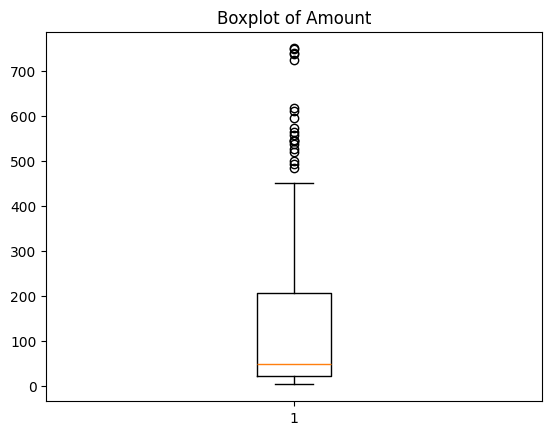

In [63]:
# Boxplot to detect outliers
plt.boxplot(df_no_outliers['Debit'])
plt.title('Boxplot of Amount')
plt.show()

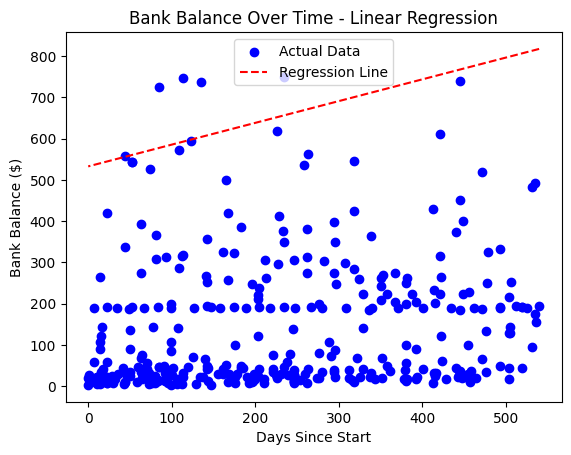

In [64]:
#Code
plt.scatter(df_no_outliers["Days"], df_no_outliers["Debit"], color="blue", label="Actual Data")
plt.plot(df_no_outliers["Days"], model.predict(df_no_outliers[["Days"]]), color="red", linestyle="dashed", label="Regression Line")
plt.xlabel("Days Since Start")
plt.ylabel("Bank Balance ($)")
plt.legend()
plt.title("Bank Balance Over Time - Linear Regression")
plt.show()

# Prediction

In [65]:
future_day = df_no_outliers["Days"].max() + 10  # 10 days ahead
predicted_amount = model.predict([[future_day]])[0]
print(f"Predicted bank balance in 10 days: ${predicted_amount:.2f}")

Predicted bank balance in 10 days: $822.72


c:\Users\Justin\Documents\GitHub\playground-projects\playground\jupyter\exploratory\project-finance-tracker-python\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
